This file is intended to perform an exploratory analysis and visualization of the data in order to answer the following business questions:

* Is our Vanish brand, overall performing well?
* Who are the key competitor(s) in each of the segments?
* What are the key products that are gaining or losing market share
* Where are the key opportunities to grow the market and sales?
* Are we performing well in sanitizer products?

In [5]:
# Basic library importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Dataframe importation
productos_vendidos = pd.read_csv('productos_vendidos.csv')
productos_vendidos.drop(columns = 'Unnamed: 0', inplace=True)
productos_vendidos.head()

,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,ATTR2,ATTR3,ID_CATEGORY,CATEGORY,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE
0,7501058792808BP2,0.006,0.139,1.000,5,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANITIZER,34-22,2022,8,34,2022-08-28
1,7501058715883,0.487,116.519,2.916,5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANITIZER,34-22,2022,8,34,2022-08-28
2,7702626213774,1.391,68.453,5.171,5,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANITIZER,34-22,2022,8,34,2022-08-28
3,7501058716422,0.022,1.481,1.833,5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANITIZER,34-22,2022,8,34,2022-08-28
4,7501058784353,2.037,182.839,5.375,5,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANITIZER,34-22,2022,8,34,2022-08-28


# Part 1 : Identifcation of key varibles

To start with the graphing of the different relationships between variables, it is necessary to define which variables are the most important in order to answer the business questions previously defined in the introduction. The following is a proposal of the most relevant variables:

##### Numerical variables :
* TOTAL_UNIT_SALES : gives us information on the total units sold per unit of time.
* TOTAL_VALUE_SALES : provides information on the total value generated per unit of time.
* TOTAL_UNIT_AVG_WEEKLY_SALES : gives information on the average weekly value generated per unit.


##### Categorical variables :
* REGION : establishes the place or geographic area where sales have been made.
* MANUFACTURER : defines the company that made the product, including RECKIT and its competition.
* BRAND : defines the product sold, including VANISH and LYSOL, products of interest for this project.
* FORMAT : defines the type or presentation of the product, including whether it is powder, liquid or bar.
* WEEK or WEEK_NUMBER: establishes the season in which products were sold.
* YEAR: establishes the year in which the products were sold.

# Parte 2 : General Visualization of Sales

In [11]:
# Filtrado por productos Vanish y Lysol (productos reckitt)
# Filter products by Brand (We are interested in Vanish and Lysol brands)
df_reckit = productos_vendidos.copy()
cond1 = df_reckit['BRAND'] == 'VANISH'
cond2 = df_reckit['BRAND'] == 'LYSOL'
df_reckit = df_reckit[cond1 | cond2]


# Now let's group our dataframe based on ITEM_CODEA
df_reckit_item_brand = df_reckit.groupby(['ITEM_CODE','BRAND'])[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES']].sum()
df_reckit_item_brand = df_reckit_item_brand.reset_index()
df_reckit_item_brand = df_reckit_item_brand[df_reckit_item_brand['TOTAL_UNIT_SALES'] > 0]
df_reckit_item_brand.head()

,ITEM_CODE,BRAND,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
0,0019200958714,LYSOL,0.004,0.474
1,7501058712813,VANISH,0.586,28.885
2,7501058713780,VANISH,0.162,3.580
3,7501058714596,VANISH,8059.988,99483.947
4,7501058715012,VANISH,0.118,3.106


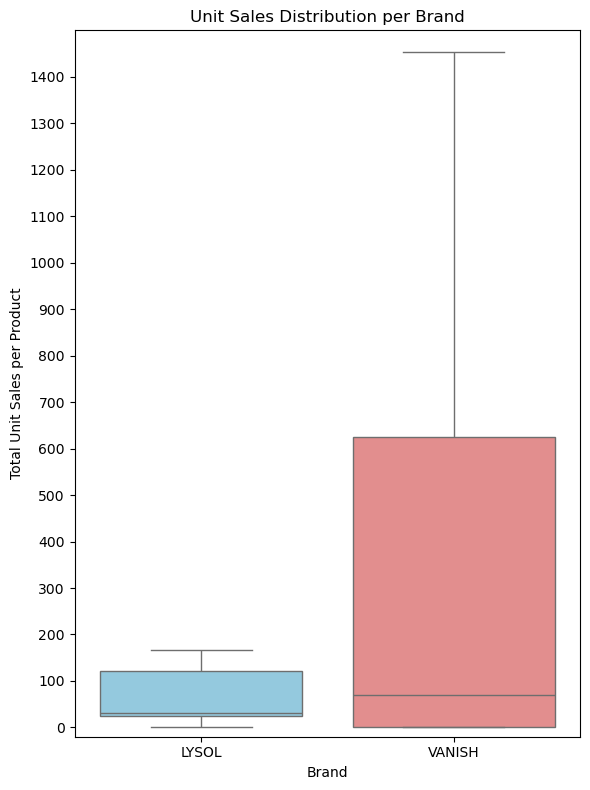

In [15]:
# Boxplot Visualization

# Figure and axis definition
fig, axs = plt.subplots(figsize=(6, 8))

# Boxplot visualization
sns.boxplot(data=df_reckit_item_brand, y='TOTAL_UNIT_SALES', x='BRAND', palette={'LYSOL': 'skyblue', 'VANISH': 'lightcoral'})

# Label and title customization
axs.set_ylabel('Total Unit Sales per Product')
axs.set_xlabel('Brand')
axs.set_title('Unit Sales Distribution per Brand')
axs.set_yticks(np.arange(0, 1500, 100))

# Show graphics
plt.ylim(top=1500, bottom=-20)
plt.tight_layout()
plt.savefig('graph1.png', dpi=200)

* Vanish products have had more unit sales than Lysol products.
* Vanish unit sales are more variable than for Lysol (specific products have been sold more often).
* Vanish has higher unit sales range than Lysol
* Lysol has unit sales which tend to be low and consistent
* Vanish has unit sales that are higher but more spread out than Lysol

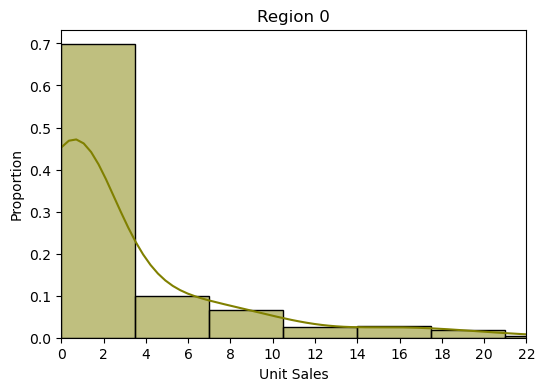

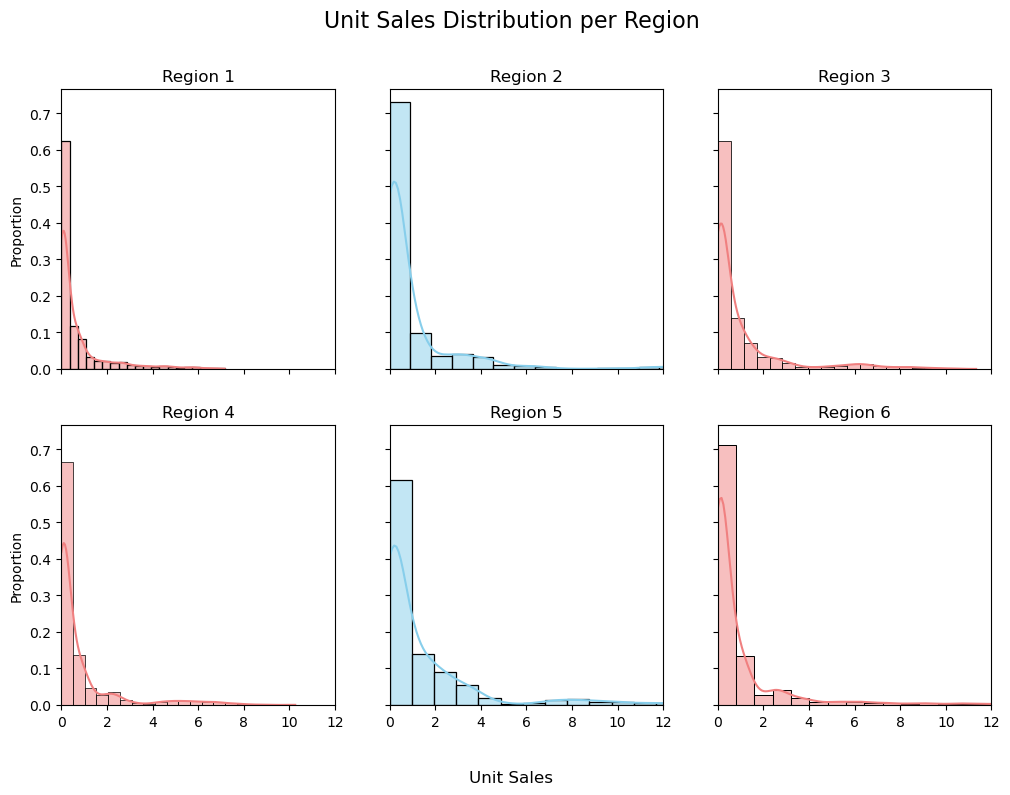

In [24]:
# Let's plot unit sales histograms per region

# First, let's filter by region

region_0 = df_reckit[df_reckit['REGION'] == 0]
region_1 = df_reckit[df_reckit['REGION'] == 1]
region_2 = df_reckit[df_reckit['REGION'] == 2]
region_3 = df_reckit[df_reckit['REGION'] == 3]
region_4 = df_reckit[df_reckit['REGION'] == 4]
region_5 = df_reckit[df_reckit['REGION'] == 5]
region_6 = df_reckit[df_reckit['REGION'] == 6]

# bins definition
n_bins=20

# Figure and axis definition for region 0
fig, ax = plt.subplots(figsize=(6,4))

# Histogram visualization (region 0)
sns.histplot(x=region_0['TOTAL_UNIT_SALES'], bins=n_bins, color='olive', kde=True, stat='proportion')

# Label and title customization
ax.set_title('Region 0')
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22])
ax.set_xlim([0,22])
ax.set_ylabel('Proportion')
ax.set_xlabel('Unit Sales')
plt.savefig('graph2_reg0.png', dpi=200)

# Figure and axis definition for all regions
fig, axs = plt.subplots(2,3,figsize=(12, 8), sharex=True, sharey=True) 

# # Histograms visualization
sns.histplot(x=region_1['TOTAL_UNIT_SALES'], bins=n_bins, color='lightcoral', ax=axs[0,0], kde=True, stat='proportion')
sns.histplot(x=region_2['TOTAL_UNIT_SALES'], bins=n_bins, color='skyblue', ax=axs[0,1], kde=True, stat='proportion')
sns.histplot(x=region_3['TOTAL_UNIT_SALES'], bins=n_bins, color='lightcoral', ax=axs[0,2], kde=True, stat='proportion')
sns.histplot(x=region_4['TOTAL_UNIT_SALES'], bins=n_bins, color='lightcoral', ax=axs[1,0], kde=True, stat='proportion')
sns.histplot(x=region_5['TOTAL_UNIT_SALES'], bins=n_bins, color='skyblue', ax=axs[1,1], kde=True, stat='proportion')
sns.histplot(x=region_6['TOTAL_UNIT_SALES'], bins=n_bins, color='lightcoral', ax=axs[1,2], kde=True, stat='proportion')

# Label and title customization
axs[0,0].set_title('Region 1')
axs[0,1].set_title('Region 2')
axs[0,2].set_title('Region 3')
axs[1,0].set_title('Region 4')
axs[1,1].set_title('Region 5')
axs[1,2].set_title('Region 6')

axs[0,0].set_xticks([0,2,4,6,8,10,12])
axs[0,0].set_xlim([0,12])
axs[0,0].set_ylabel('Proportion')
axs[1,0].set_ylabel('Proportion')
axs[1, 0].set_xlabel('')
axs[1, 1].set_xlabel('')
axs[1, 2].set_xlabel('')

fig.suptitle('Unit Sales Distribution per Region', fontsize=16)
fig.supxlabel('Unit Sales')
plt.savefig('graph2.png', dpi=200)

Common Characteristics:
* Bias to the right: most of the products in each region are sold in small quantities.

Unique characteristics:
* Highest concentration of low sales: regions 2 and 6 (~80%)
* Places with greater variety of sales: region 5 and 3 (longer queues).

# Part 3: Analysis of the sales trend over time

In this section we will proceed to analyze and visualize sales in the years 2022 and 2023, respectively. First, a grouping of the data by month will be performed on each dataframe (data for 2022 and 2023, respectively). Once this grouping is done, the total units sold (TOTAL_UNIT_SALES), the total value generated (TOTAL_VALUE_SALES) and the weekly average generated per unit (TOTAL_UNIT_AVG_WEEKLY_SALES) will be added together.

Once the data has been grouped, each variable will be plotted against time, which in this case will be the recorded months of sales.

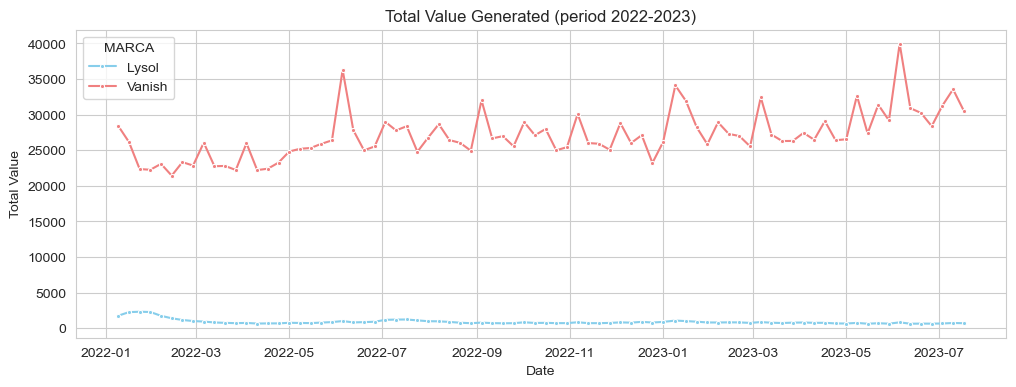

In [29]:
# Datetime Conversion
df_reckit['DATE'] = pd.to_datetime(df_reckit['DATE'])

# Grouping by Date and Brand
df_date= df_reckit.groupby(['DATE', 'BRAND']).agg({'TOTAL_VALUE_SALES':'sum'})

# Index Reset
df_date = df_date.reset_index()
df_date.rename(columns={'BRAND':'MARCA'}, inplace=True)

# Change to lower case words
def cambio_palabra(palabra):
    if palabra == 'LYSOL':
        return 'Lysol'
    elif palabra == 'VANISH':
        return 'Vanish'
df_date['MARCA'] = df_date['MARCA'].apply(cambio_palabra)


# Total Value Sales plot over 2022 and 2023
sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_date, x='DATE', y='TOTAL_VALUE_SALES', hue='MARCA', palette={'Lysol': 'skyblue', 'Vanish': 'lightcoral'},markers=True, marker='.')
plt.title('Total Value Generated (period 2022-2023)')
plt.ylabel('Total Value')
plt.xlabel('Date')
plt.savefig('graph3.png', dpi=200)

# Part 4 : Visualization of the geographic distribution of sales

In this section we will visualize which regions have the highest unit sales and the highest value generated. For this, we will use a barplot.

In [32]:
# Grouping by manufacturer
df_reckit_manuf = productos_vendidos.groupby(['MANUFACTURER']).agg({'TOTAL_VALUE_SALES':'sum'})
df_reckit_manuf.reset_index(inplace=True)
df_reckit_manuf = df_reckit_manuf.sort_values(by='TOTAL_VALUE_SALES')
df_reckit_manuf = df_reckit_manuf.tail(5)

# Change names to lower case
def cambio_manufacturer(palabra):
    if palabra == 'DELTA PRONATURA':
        return 'Delta Pronatura'
    elif palabra == 'CHURCH & DWIGHT':
        return 'Church & Dwight'
    elif palabra == 'CLOROX':
        return 'Clorox'
    elif palabra == 'RECKITT':
        return 'Reckitt'
    elif palabra == 'INDS. ALEN':
        return 'Inds. Alen'
df_reckit_manuf['MANUFACTURER'] = df_reckit_manuf['MANUFACTURER'].apply(cambio_manufacturer)
df_reckit_manuf = df_reckit_manuf.reset_index()
df_reckit_manuf.drop('index', axis=1, inplace=True)
df_reckit_manuf

,MANUFACTURER,TOTAL_VALUE_SALES
0,Delta Pronatura,279719.229
1,Church & Dwight,436970.719
2,Clorox,1371751.724
3,Reckitt,2238846.945
4,Inds. Alen,6053477.316


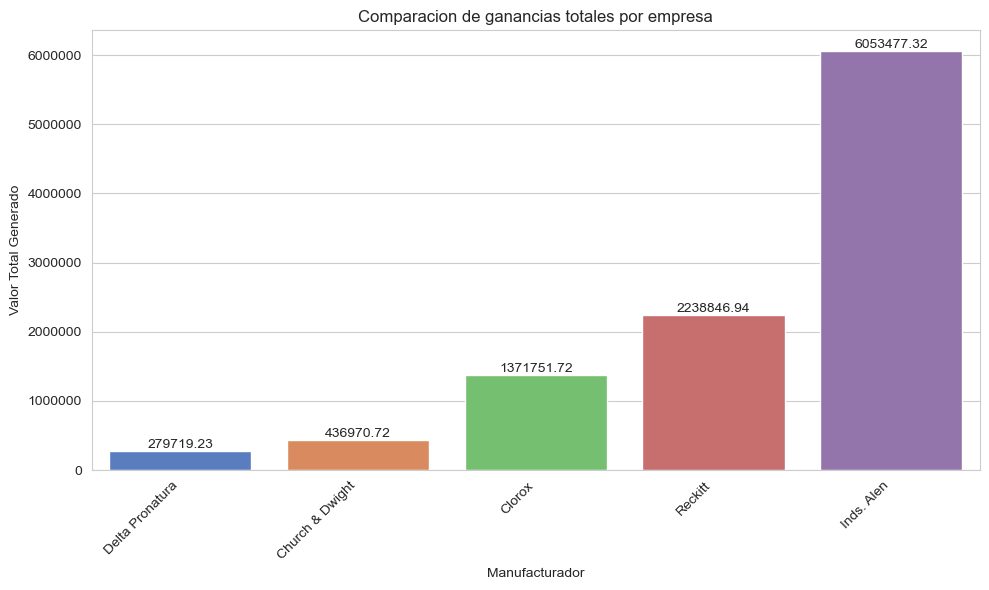

In [150]:
# Style graph definition
sns.set_style("whitegrid")

# Figure and axis definition
plt.figure(figsize=(10, 6))

# Barplot visualization
ax = sns.barplot(df_reckit_manuf, x='MANUFACTURER', y='TOTAL_VALUE_SALES', palette='muted')

# Label and title customization
plt.title('Comparison of total earnings by company')
plt.ylabel('Total Value Earnings')
plt.xlabel('Manufacturador')
plt.ticklabel_format(style='plain', axis='y')

# Bar labels visualization
for container in ax.containers:
    plt.bar_label(container, fmt='%.2f') 


plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para evitar solapamiento
plt.tight_layout() # Ajustar el layout para evitar que las etiquetas se corten
plt.savefig('graph4.png', dpi=200)


Con base en el gráfico de barras, la región 2 fue el área que más venta de unidades tuvo, seguido de la región 6 y 5. En el caso del valor total generado, la región 5 fue la que más ganancias obtuvo, esto probablemente a la venta de productos con mayor valor ($). En el caso del valor promedio semanal generado por unidad, la región 3, 5 y 6 tuvieron valores similares. 

Las regiones con menos ventas y menos ganancias fueron las regiones 1 y 2. 